In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("viridis")

df = pd.read_csv("/content/aqi_features_v1.csv")
df["date"] = pd.to_datetime(df["date"])

df.head()


,date,temperature,humidity,wind_speed,rain,pressure,pm25,pm10,no2,o3,...,aqi_lag_2,aqi_lag_3,aqi_change_rate,aqi_change_rate_3d,aqi_roll_3,aqi_roll_7,aqi_target_1d,aqi_target_2d,aqi_target_3d,aqi_delta_3d
0,2025-06-07,30.0,71,17.1,0.0,1006.3,23.320833,62.908333,7.533333,71.333333,...,77.145655,82.594373,-4.629630,-8.404558,76.718305,89.878498,72.569444,70.334758,70.245726,-3.944088
1,2025-06-08,30.0,70,16.6,0.0,1005.8,22.562500,53.975000,8.062500,75.750000,...,78.819444,77.145655,-1.620370,-4.576211,75.192901,85.433061,70.334758,70.245726,69.328704,-3.240741
2,2025-06-09,30.0,69,17.0,0.0,1004.6,21.516667,48.766667,7.937500,70.041667,...,74.189815,78.819444,-2.234687,-8.484687,72.364672,78.044872,70.245726,69.328704,59.668803,-10.665954
3,2025-06-10,30.4,68,17.7,0.0,1002.6,21.475000,49.366667,7.204167,71.500000,...,72.569444,74.189815,-0.089031,-3.944088,71.049976,75.128460,69.328704,59.668803,71.171652,0.925926
4,2025-06-11,30.3,73,16.5,0.0,1001.8,21.045833,45.662500,7.337500,69.666667,...,70.334758,72.569444,-0.917023,-3.240741,69.969729,73.233364,59.668803,71.171652,93.322650,23.993946


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                225 non-null    datetime64[ns]
 1   temperature         225 non-null    float64       
 2   humidity            225 non-null    int64         
 3   wind_speed          225 non-null    float64       
 4   rain                225 non-null    float64       
 5   pressure            225 non-null    float64       
 6   pm25                225 non-null    float64       
 7   pm10                225 non-null    float64       
 8   no2                 225 non-null    float64       
 9   o3                  225 non-null    float64       
 10  so2                 225 non-null    float64       
 11  aqi                 225 non-null    float64       
 12  aqi_lag_1           225 non-null    float64       
 13  aqi_lag_2           225 non-null    float64       

In [4]:
df.isna().sum()

,0
date,0
temperature,0
humidity,0
wind_speed,0
rain,0
pressure,0
pm25,0
pm10,0
no2,0
o3,0


These rows were correctly dropped during feature engineering

# Visulaization

AQI Trend Over Time

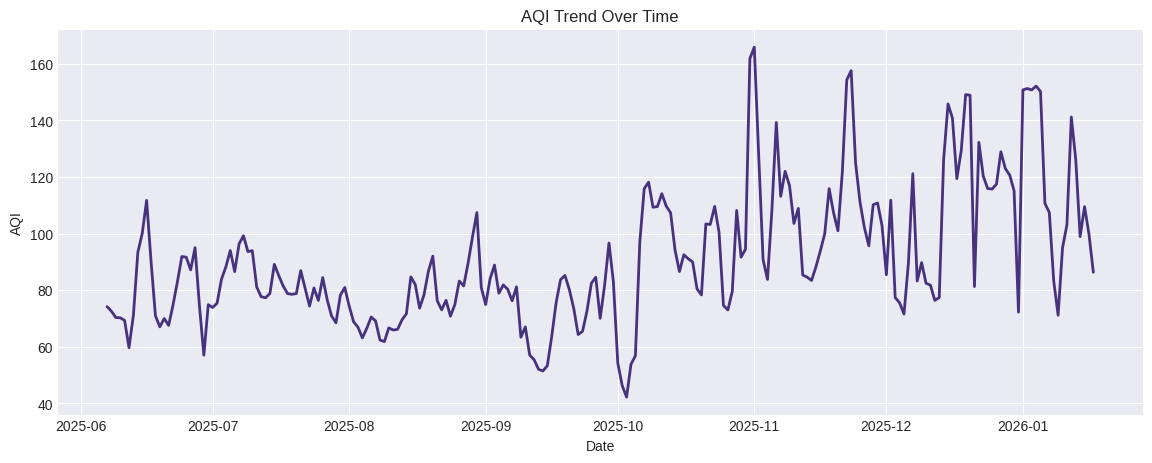

In [7]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["aqi"], linewidth=2)
plt.title("AQI Trend Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()




*   AQI shows clear temporal variation
* Spikes indicate pollution episodes


*   Justifies time-aware forecasting

AQI Distribution

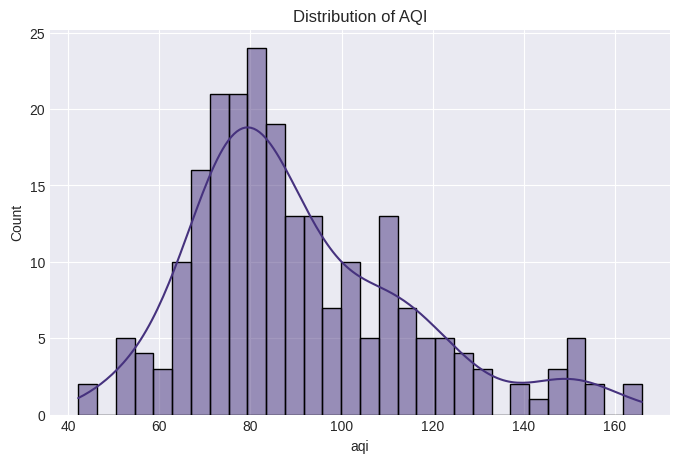

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["aqi"], bins=30, kde=True)
plt.title("Distribution of AQI")
plt.show()


*   **Mostly Good Air:** The chart shows that most days have a lower AQI, meaning the air quality is generally good or moderate for a significant portion of the time.
*   **Common Range:** A large number of the daily AQI values fall within a particular range, suggesting consistent air quality levels on most days.
*   **Occasional Spikes:** There are fewer days with very high AQI values, but these do occur, indicating periods when air quality can become significantly poor.

Pollutants vs AQI

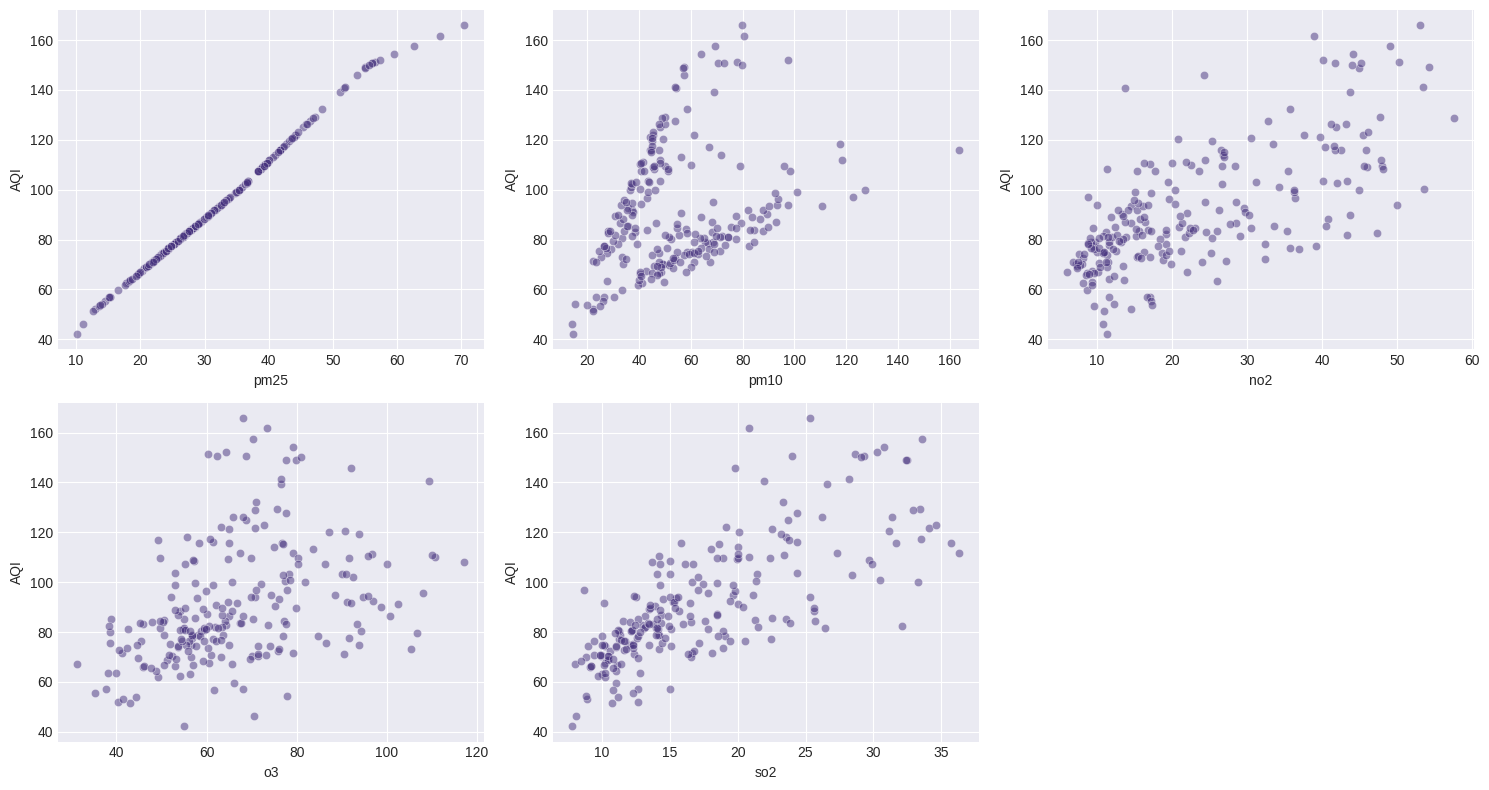

In [10]:
pollutants = ["pm25", "pm10", "no2", "o3", "so2"]

plt.figure(figsize=(15,8))
for i, col in enumerate(pollutants, 1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=df[col], y=df["aqi"], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("AQI")

plt.tight_layout()
plt.show()




*  PM2.5 strongest visual relationship with AQI

* Gaseous pollutants show moderate impact



Weather Impact on AQI

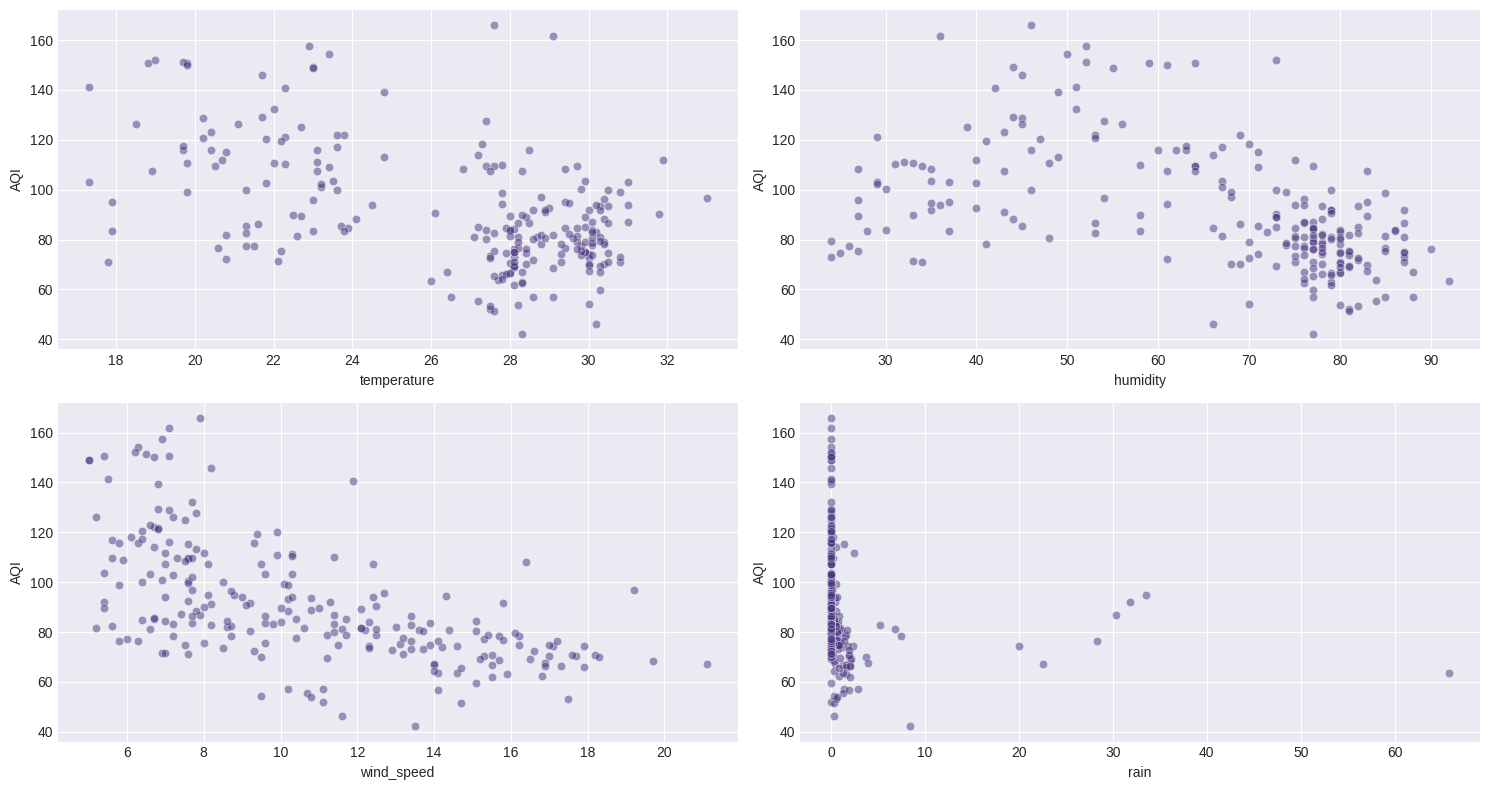

In [11]:
weather_cols = ["temperature", "humidity", "wind_speed", "rain"]

plt.figure(figsize=(15,8))
for i, col in enumerate(weather_cols, 1):
    plt.subplot(2,2,i)
    sns.scatterplot(x=df[col], y=df["aqi"], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("AQI")

plt.tight_layout()
plt.show()


* Higher wind speed → lower AQI


* The temperature and humidity reveals no clear correlation, indicating that these are not alone a strong predictor of AQI fluctuations. Other factors likely play a more significant role in influencing air quality.

Correlation Heatmap

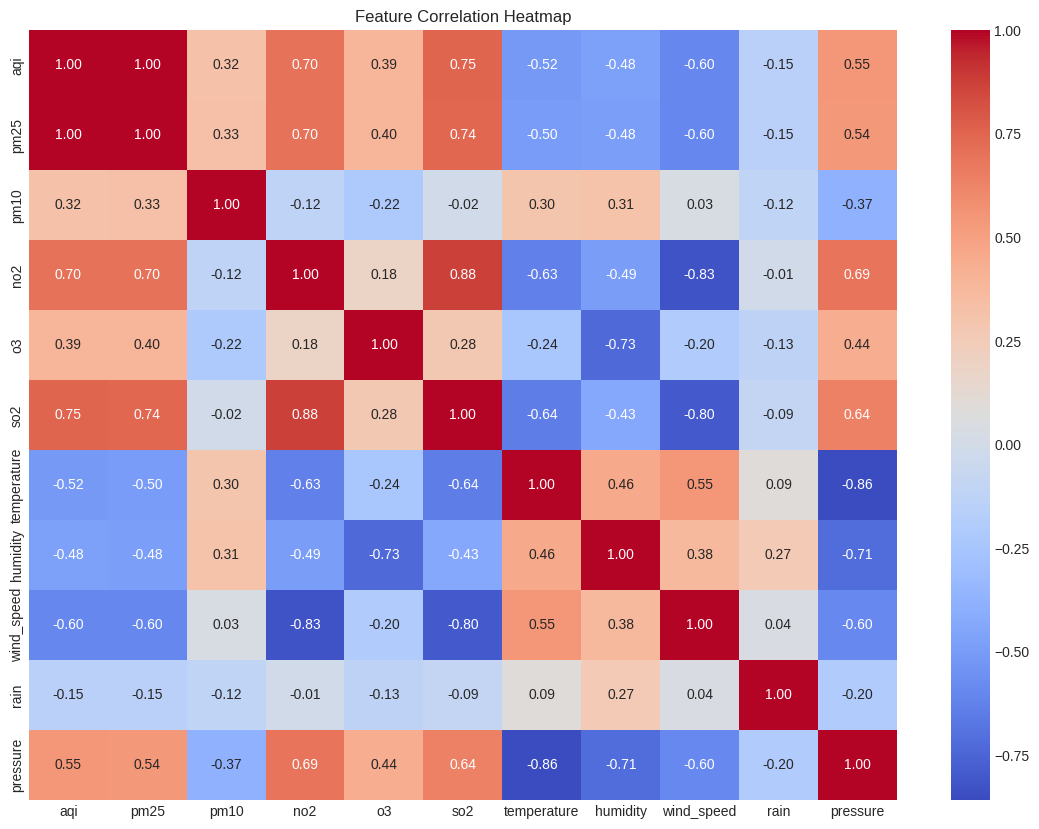

In [12]:
plt.figure(figsize=(14,10))
corr = df[
    ["aqi","pm25","pm10","no2","o3","so2",
     "temperature","humidity","wind_speed","rain","pressure"]
].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


* PM2.5 is the Main Driver of AQI: The heatmap clearly shows that pm25 have extremely high correlatiob with aqi. This is becuase I have drived aqi direclty from pm25

* Other Pollutants Also Matter: so2  and no2  also have strong positive correlations with aqi. So, higher levels of these gases generally lead to worse air quality.

* Wind Helps Clean the Air: wind_speed has a moderate negative correlation with aqi. This suggests that stronger winds tend to lower the AQI, likely by dispersing pollutants.

* For temperature, humidity, rain, and pressure, their correlation with aqi is very low. This implies that these weather factors, by themselves, don't have a strong, simple direct relationship with overall air quality. Their influence might be more complex or indirect.

Lag Feature Effectiveness

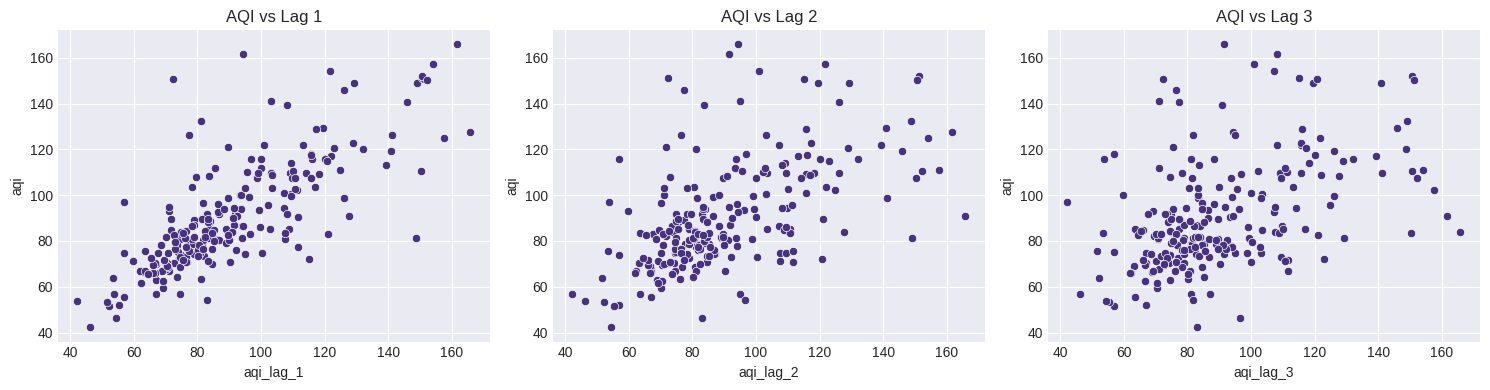

In [13]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.scatterplot(x=df["aqi_lag_1"], y=df["aqi"])
plt.title("AQI vs Lag 1")

plt.subplot(1,3,2)
sns.scatterplot(x=df["aqi_lag_2"], y=df["aqi"])
plt.title("AQI vs Lag 2")

plt.subplot(1,3,3)
sns.scatterplot(x=df["aqi_lag_3"], y=df["aqi"])
plt.title("AQI vs Lag 3")

plt.tight_layout()
plt.show()


1. **Yesterday's Air Quality is Crucial:** Today's Air Quality Index  is strongly influenced by the AQI from yesterday; good air quality yesterday often predicts good air quality today, and the same applies conversely.

2. **Past Days Have Less Impact:** While AQI from two and three days ago is valuable for predicting today's AQI, its influence is not as strong as that of yesterday's AQI.

Rolling Mean Smoothing Effect

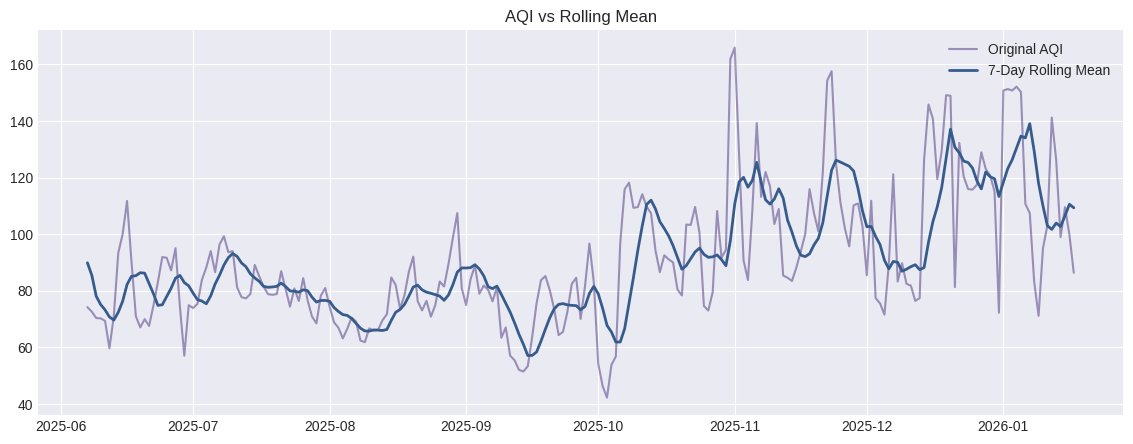

In [14]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["aqi"], label="Original AQI", alpha=0.5)
plt.plot(df["date"], df["aqi_roll_7"], label="7-Day Rolling Mean", linewidth=2)
plt.legend()
plt.title("AQI vs Rolling Mean")
plt.show()


* The '7-Day Rolling Mean' line provides a smoother representation of data compared to the 'Original AQI' line, helping to eliminate daily fluctuations and offering a clearer view of overall trends. This smoothing makes it easier to identify and interpret longer-term patterns.

Target Variable Validation

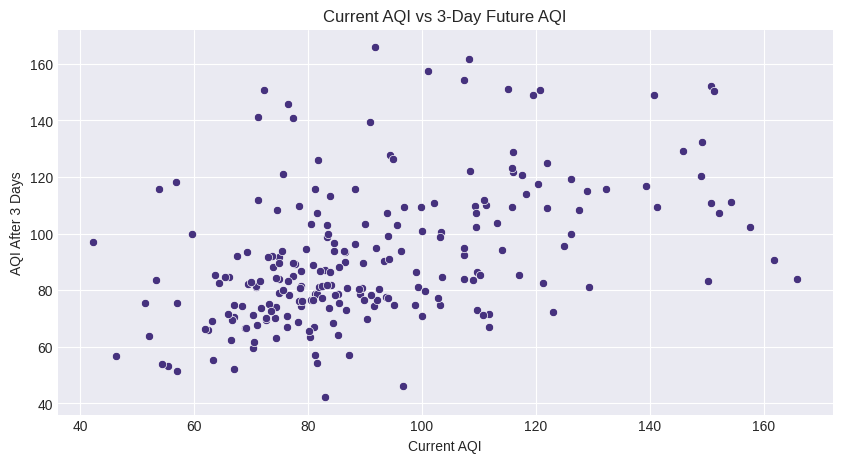

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["aqi"], y=df["aqi_target_3d"])
plt.xlabel("Current AQI")
plt.ylabel("AQI After 3 Days")
plt.title("Current AQI vs 3-Day Future AQI")
plt.show()



* There is a tendency for air quality index (AQI) levels to remain consistent over a three-day period, with high AQI values likely staying high and low values remaining low. However, the data points are quite spread out, suggesting that relying solely on current AQI may not be sufficient. It is recommended to incorporate additional information, such as past AQI values, pollutant levels, and weather data, to create a more accurate forecast model for air quality three days in advance.